# **Решения уравнения фильтрации с учетом скин-фактора и послепритока**
**Щербатюк Р.Р.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import *
mp.dps = 15; mp.pretty = True
import scipy.special as sc

Решение линейного стока в пространстве Лапласа

In [ ]:
def pd_lapl(s, rd=1):
    return 1/s * 1/(rd*s**0.5) * besselk(0, rd*s**0.5) / besselk(1, rd*s**0.5)
    #return 1/s * besselk(0, rd*s**0.5) 

Реализация функции расчета безразмерного давления на основе преобразования Лапласа

In [ ]:
def pd_line_source_lapl(rd, td):
    fp = lambda p: pd_lapl(p, rd)
    return invertlaplace(fp, td, method='stehfest', degree = 5)

pd_ls_func = np.vectorize(pd_line_source_lapl)

Решение линейного стока в пространстве Лапласа

In [ ]:
def pd_ws_lapl(s, S, Cd):
    return 1 / s * (S + s * pd_lapl(s)) / (1 + s * Cd * (S + s * pd_lapl(s)))

Реализация функции расчета безразмерного давления на основе преобразования Лапласа

In [ ]:
def pd_wbs_lapl(rd, td, S =0 , Cd = 0):
    fp = lambda p: pd_ws_lapl(p, S, Cd)
    return invertlaplace(fp, td, method='stehfest', degree = 5)


pd_wbs_func = np.vectorize(pd_wbs_lapl)

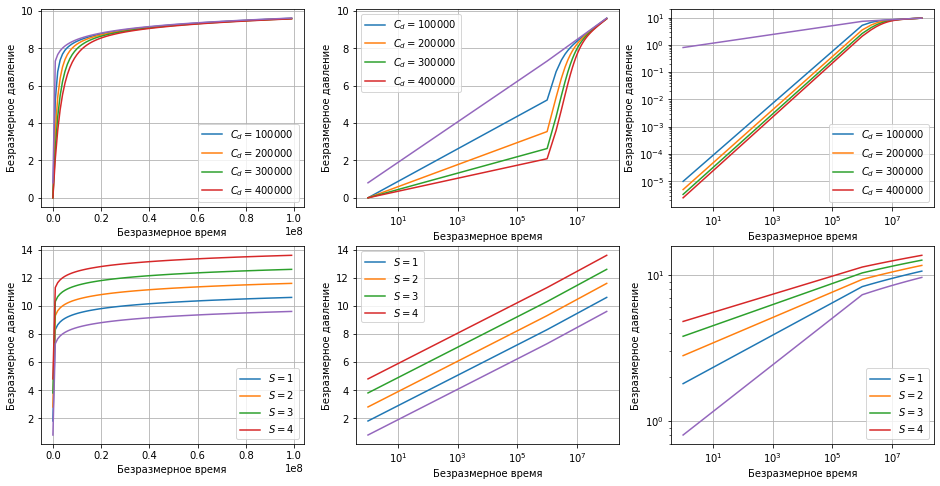

In [ ]:
t_d = np.arange(1, 1e8, 1e6)
r_d = 1
S = 0
S1 = 1
C_d = 100000 
p_d_1 = pd_ls_func(r_d, t_d)
C_d1 = 0

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6) )= plt.subplots(2,3)
#fig.suptitle("Решение с учетом скин-фактор и послепритока для $S = {}$ ".format(S))
fig.set_size_inches(16, 8)
clist = np.arange(1,5,1)
for ci in clist:
    p_d_2 = pd_wbs_func(r_d, t_d, S, ci*C_d)
    p_d_3 = pd_wbs_func(r_d, t_d, ci*S1, C_d1)
    
    ax1.plot(t_d, p_d_2, label = '$С_d = {}$ '.format(ci*C_d,2))
    ax2.plot(t_d, p_d_2, label = '$C_d = {}$ '.format(ci*C_d,2))
    ax3.plot(t_d, p_d_2, label = '$C_d = {}$ '.format(ci*C_d,2))
    
    ax4.plot(t_d, p_d_3, label = '$S = {}$ '.format(ci*S1,2))
    ax5.plot(t_d, p_d_3, label = '$S = {}$ '.format(ci*S1,2))
    ax6.plot(t_d, p_d_3, label = '$S = {}$ '.format(ci*S1,2))
    
#в обычных координатах с учетом скин-фактор
ax1.plot(t_d, p_d_1)
ax1.set_xlabel("Безразмерное время")
ax1.set_ylabel("Безразмерное давление")
ax1.legend()
ax1.grid()

#в полу-логарифмических координатах с учетом скин-фактор
ax2.set_xscale('log')
ax2.plot(t_d, p_d_1)
ax2.set_xlabel("Безразмерное время")
ax2.set_ylabel("Безразмерное давление")
ax2.legend()
ax2.grid()

#в двойных логарифмических координатах с учетом скин-фактор
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.plot(t_d, p_d_1)
ax3.set_xlabel("Безразмерное время")
ax3.set_ylabel("Безразмерное давление")
ax3.legend()
ax3.grid()

#в обычных координатах с учетом послепритока
ax4.plot(t_d, p_d_1)
ax4.set_xlabel("Безразмерное время")
ax4.set_ylabel("Безразмерное давление")
ax4.legend()
ax4.grid()

#в полу-логарифмических координатах с учетом послепритока
ax5.set_xscale('log')
ax5.plot(t_d, p_d_1)
ax5.set_xlabel("Безразмерное время")
ax5.set_ylabel("Безразмерное давление")
ax5.legend()
ax5.grid()

#в двойных логарифмических координатах с учетом послепритока
ax6.set_xscale('log')
ax6.set_yscale('log')
ax6.plot(t_d, p_d_1)
ax6.set_xlabel("Безразмерное время")
ax6.set_ylabel("Безразмерное давление")
ax6.legend()
ax6.grid()


plt.show()

In [ ]:
def td_t(td, ct = 1e-5,f = 0.2, mu = 1, r_w = 0.1 , k = 20):
    return td * f * mu * ct * r_w ** 2 /0.00036 /k

In [ ]:
def pd_p(p_d, r = 0.1, k = 40, p_res = 250, q_liq = 50, mu = 1, B= 1.2, h= 10):
    return p_res - 18.41 * q_liq * mu * B /k /h * p_d 

In [ ]:
def dep(p_d, r = 0.1, k = 40, p_res = 250, q_liq = 50, mu = 1, B= 1.2, h= 10):
    return  18.41 * q_liq * mu * B /k /h * p_d 

# **Решение уравнения фильтрации с учетом конечного радиуса скважины и наличия послепритока в скважине**

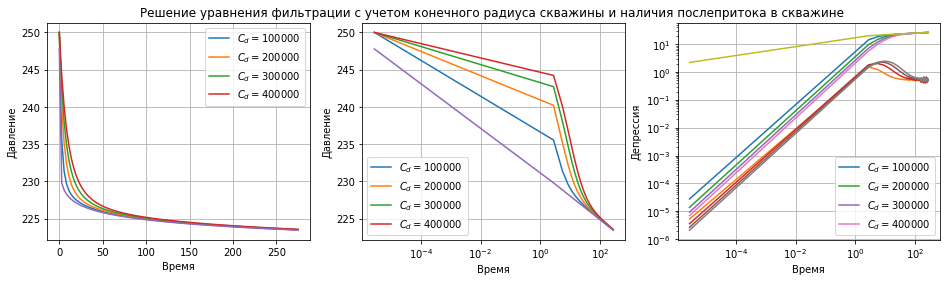

In [ ]:
t_d = np.arange(1, 1e8, 1e6)
r_d = 1
S = 0
S1 = 1
S0 = 0
C_d = 100000 
p_d_1 = pd_ls_func(r_d, t_d)
C_d1 = 0
C_d0 = 0
k = 10
ct = 1e-5

fig, (ax1, ax2, ax3 )= plt.subplots(1,3)
#fig.suptitle("Решение с учетом скин-фактор и послепритока для $S = {}$ ".format(S))
fig.set_size_inches(16, 4)
clist = np.arange(1,5,1)
for ci in clist:
    p_d_0 = pd_wbs_func(r_d, t_d, S0, C_d0)
    p_d_2 = pd_wbs_func(r_d, t_d, S, ci*C_d)
    p_d_3 = pd_wbs_func(r_d, t_d, ci*S1, C_d1)
    
    ax1.plot(td_t(t_d), pd_p(p_d_2), label = '$С_d = {}$ '.format(ci*C_d,2))
    ax2.plot(td_t(t_d), pd_p(p_d_2), label = '$C_d = {}$ '.format(ci*C_d,2))
    ax3.plot(td_t(t_d), dep(p_d_2), label = '$C_d = {}$ '.format(ci*C_d,2))
    ax3.plot(td_t(t_d)[:-1], np.diff(p_d_2)/np.diff(td_t(t_d))*td_t(t_d)[:-1])
    
#в обычных координатах с учетом послепритока    
ax1.plot(td_t(t_d), pd_p(p_d_1))
ax1.set_xlabel("Время")
ax1.set_ylabel("Давление")
ax1.legend()
ax1.grid()

#в полу-логарифмических координатах с учетом послепритока
ax2.set(title = "Решение уравнения фильтрации с учетом конечного радиуса скважины и наличия послепритока в скважине ")
ax2.set_xscale('log')
ax2.plot(td_t(t_d), pd_p(p_d_1))
ax2.set_xlabel("Время")
ax2.set_ylabel("Давление")
ax2.legend()
ax2.grid()

#в двойных логарифмических координатах с учетом послепритока
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.plot(td_t(t_d), dep(p_d_1))
ax3.set_xlabel("Время")
ax3.set_ylabel("Депрессия")
ax3.legend()
ax3.grid()

plt.show()

# **Решение уравнения фильтрации с учетом конечного радиуса скважины и наличия Скин-фактора**

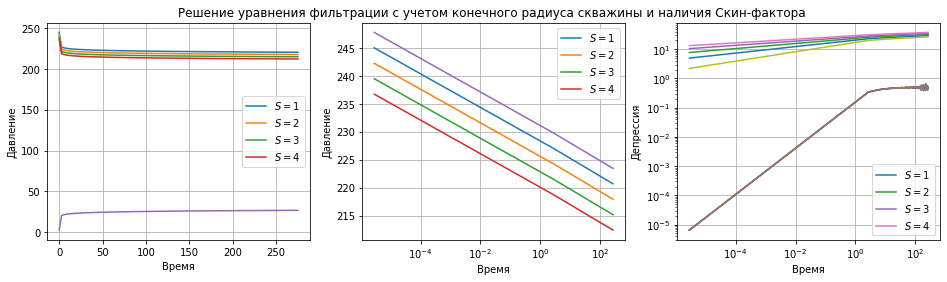

In [ ]:
t_d = np.arange(1, 1e8, 1e6)
r_d = 1
S = 0
S1 = 1
S0 = 0
C_d = 100000 
p_d_1 = pd_ls_func(r_d, t_d)
C_d1 = 0
C_d0 = 0
k = 10
ct = 1e-5

fig, (ax4, ax5, ax6)= plt.subplots(1,3)
#fig.suptitle("Решение с учетом скин-фактор и послепритока для $S = {}$ ".format(S))
fig.set_size_inches(16, 4)
clist = np.arange(1,5,1)
for ci in clist:
    p_d_0 = pd_wbs_func(r_d, t_d, S0, C_d0)
    p_d_2 = pd_wbs_func(r_d, t_d, S, ci*C_d)
    p_d_3 = pd_wbs_func(r_d, t_d, ci*S1, C_d1)
    ax4.plot(td_t(t_d), pd_p(p_d_3), label = '$S = {}$ '.format(ci*S1,2))
    ax5.plot(td_t(t_d), pd_p(p_d_3), label = '$S = {}$ '.format(ci*S1,2))
    ax6.plot(td_t(t_d), dep(p_d_3), label = '$S = {}$ '.format(ci*S1,2))
    ax6.plot(td_t(t_d)[:-1], np.diff(p_d_3)/np.diff(td_t(t_d))*td_t(t_d)[:-1])

ax4.plot(td_t(t_d), dep(p_d_1))
ax4.set_xlabel("Время")
ax4.set_ylabel("Давление")
ax4.legend()
ax4.grid()

ax5.set(title = "Решение уравнения фильтрации с учетом конечного радиуса скважины и наличия Скин-фактора ")
ax5.set_xscale('log')
ax5.plot(td_t(t_d), pd_p(p_d_1))
ax5.set_xlabel("Время")
ax5.set_ylabel("Давление")
ax5.legend()
ax5.grid()

ax6.set_xscale('log')
ax6.set_yscale('log')
ax6.plot(td_t(t_d), dep(p_d_1))
ax6.set_xlabel("Время")
ax6.set_ylabel("Депрессия")
ax6.legend()
ax6.grid()

plt.show()

# **Решение уравнения фильтрации с учетом конечного радиуса скважины и различной проницаемостью**

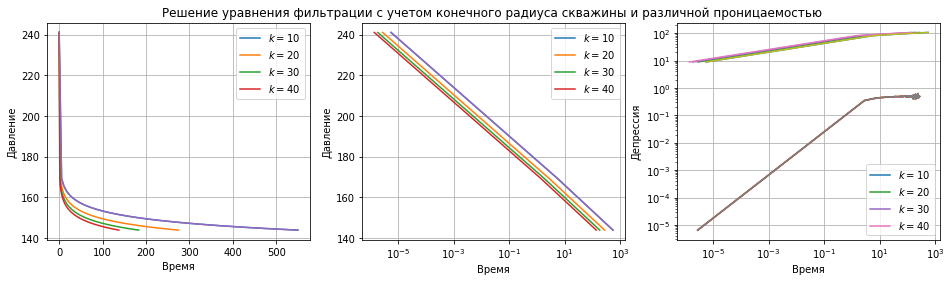

In [ ]:
t_d = np.arange(1, 1e8, 1e6)
r_d = 1
S = 0
S1 = 1
S0 = 0
C_d = 100000 
p_d_1 = pd_ls_func(r_d, t_d)
C_d1 = 0
C_d0 = 0
k = 10
ct = 1e-5

fig, (ax7, ax8, ax9)= plt.subplots(1,3)
#fig.suptitle("Решение с учетом скин-фактор и послепритока для $S = {}$ ".format(S))
fig.set_size_inches(16, 4)
clist = np.arange(1,5,1)
for ci in clist:
    p_d_0 = pd_wbs_func(r_d, t_d, S0, C_d0)
    p_d_2 = pd_wbs_func(r_d, t_d, S, ci*C_d)
    p_d_3 = pd_wbs_func(r_d, t_d, ci*S1, C_d1)

    ax7.plot(td_t(t_d, k=k*ci), pd_p(p_d_0, k=k), label = '$k = {}$ '.format(k*ci,2))
    ax8.plot(td_t(t_d, k=k*ci), pd_p(p_d_0, k=k), label = '$k = {}$ '.format(k*ci,2))
    ax9.plot(td_t(t_d, k=k*ci), dep(p_d_0, k=k), label = '$k = {}$ '.format(k*ci,2))
    ax9.plot(td_t(t_d)[:-1], np.diff(p_d_0)/np.diff(td_t(t_d))*td_t(t_d)[:-1])

ax7.plot(td_t(t_d, k=k), pd_p(p_d_1, k=k))
ax7.set_xlabel("Время")
ax7.set_ylabel("Давление")
ax7.legend()
ax7.grid()

ax8.set(title = "Решение уравнения фильтрации с учетом конечного радиуса скважины и различной проницаемостью ")
ax8.set_xscale('log')
ax8.plot(td_t(t_d, k=k), pd_p(p_d_1, k=k))
ax8.set_xlabel("Время")
ax8.set_ylabel("Давление")
ax8.legend()
ax8.grid()

ax9.set_xscale('log')
ax9.set_yscale('log')
ax9.plot(td_t(t_d, k=k), dep(p_d_1, k=k))
ax9.set_xlabel("Время")
ax9.set_ylabel("Депрессия")
ax9.legend()
ax9.grid()

plt.show()

# **Решение уравнения фильтрации с учетом конечного радиуса скважины и различной сжимаемостью**

No handles with labels found to put in legend.


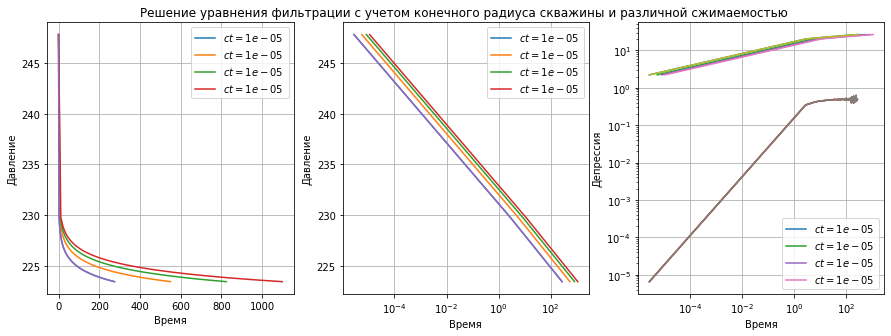

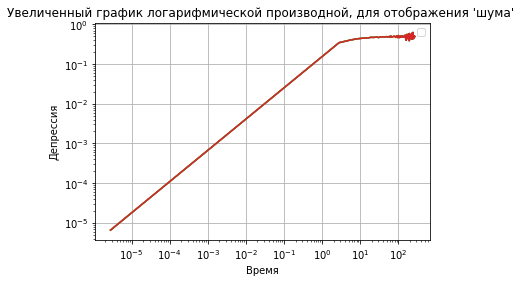

In [ ]:
t_d = np.arange(1, 1e8, 1e6)
r_d = 1
S = 0
S1 = 1
S0 = 0
C_d = 100000 
p_d_1 = pd_ls_func(r_d, t_d)
C_d1 = 0
C_d0 = 0
k = 10
ct = 1e-5

fig, (ax10, ax11, ax12)= plt.subplots(1,3)
#fig.suptitle("Решение с учетом скин-фактор и послепритока для $S = {}$ ".format(S))
fig.set_size_inches(15, 5)
fig2, ax13 = plt.subplots()
clist = np.arange(1,5,1)
for ci in clist:
    p_d_0 = pd_wbs_func(r_d, t_d, S0, C_d0)
    p_d_2 = pd_wbs_func(r_d, t_d, S, ci*C_d)
    p_d_3 = pd_wbs_func(r_d, t_d, ci*S1, C_d1)
    
    ax10.plot(td_t(t_d, ct=ct*ci), pd_p(p_d_0), label = '$ct = {}$ '.format(ct*S1,2))
    ax11.plot(td_t(t_d, ct=ct*ci), pd_p(p_d_0), label = '$ct = {}$ '.format(ct*S1,2))
    ax12.plot(td_t(t_d, ct=ct*ci), dep(p_d_0), label = '$ct = {}$ '.format(ct*S1,2))
    ax12.plot(td_t(t_d)[:-1], np.diff(p_d_0)/np.diff(td_t(t_d))*td_t(t_d)[:-1])
    ax13.plot(td_t(t_d)[:-1], np.diff(p_d_0)/np.diff(td_t(t_d))*td_t(t_d)[:-1])

ax10.plot(td_t(t_d, ct=ct), pd_p(p_d_1))
ax10.set_xlabel("Время")
ax10.set_ylabel("Давление")
ax10.legend()
ax10.grid()

ax11.set(title = "Решение уравнения фильтрации с учетом конечного радиуса скважины и различной сжимаемостью ")
ax11.set_xscale('log')
ax11.plot(td_t(t_d, ct=ct), pd_p(p_d_1))
ax11.set_xlabel("Время")
ax11.set_ylabel("Давление")
ax11.legend()
ax11.grid()

ax12.set_xscale('log')
ax12.set_yscale('log')
ax12.plot(td_t(t_d, ct=ct), dep(p_d_1))
ax12.set_xlabel("Время")
ax12.set_ylabel("Депрессия")
ax12.legend()
ax12.grid()

ax13.set(title = "Увеличенный график логарифмической производной, для отображения 'шума' ")
ax13.set_xscale('log')
ax13.set_yscale('log')
ax13.set_xlabel("Время")
ax13.set_ylabel("Депрессия")
ax13.legend()
ax13.grid()
plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.show()